In [4]:
!pip install lightgbm  # 初期状態にて入っていないパッケージをインストールする
!pip install optuna==1.5.0  # 初期状態にて入っていないパッケージをインストールする

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 6.2 MB/s 
     |████████████████████████████████| 209 kB 34.0 MB/s 
     |████████████████████████████████| 81 kB 7.2 MB/s 
     |████████████████████████████████| 78 kB 4.5 MB/s 
     |████████████████████████████████| 147 kB 10.6 MB/s 
     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 112 kB 43.9 MB/s 
  Created wheel for optuna: filename=optuna-1.5.0-py3-none-any.whl size=276157 sha256=f846d8dd6116e40ca0d0f2a88b0ee92ec9b12aaf58b85372ea5a06d7e2384010
  Stored in directory: /root/.cache/pip/wheels/0a/f9/1b/1c068c5fb648ad0a4600c104495c61ae780a2f3bcf52bcd676
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=ef5f968ad752f88a45ddee51620bf865eec5e2b7540394084db16e

２回目以降

In [5]:
#  データ解析用ライブラリ
import pandas as pd
import numpy as np

#  データ可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns
 
#  LightGBMライブラリ
import lightgbm as lgb
 
#  訓練データとモデル評価用データに分けるライブラリ
from sklearn.model_selection import train_test_split
 
#  ハイパーパラメータチューニング自動化ライブラリ
import optuna

#  LightGBM用 Optunaライブラリ
from optuna.integration import lightgbm_tuner

#  関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
#  データの読み込み
df = pd.read_excel(r'concrete.xlsx', sheet_name='concrete', header=0)
'''一番上の行は説明変数・目的変数'''
'''「concrete.xlsx」は同じ階層に配置してください'''
#  目的変数の設定
the_objective = 'Concrete compressive strength'

In [14]:
#  データの分割
train_set, test_set = train_test_split(df, test_size=0.2, random_state=4)
'''訓練データとテストデータの比率(test_size)を設定します'''
'''分割時の乱数(random_state)を設定します'''
'''random_stateの数字を変えると、分け方が変わります'''

'random_stateの数字を変えると、分け方が変わります'

In [15]:
#  訓練データを説明変数と目的変数に分割
X_train = train_set.drop('Concrete compressive strength', axis=1)
'''訓練データから目的変数を除去→訓練データの説明変数のみを抽出します'''
y_train = train_set['Concrete compressive strength']
'''訓練データから目的変数のみを抽出します'''

#  テストデータを説明変数と目的変数に分割
X_test = test_set.drop('Concrete compressive strength', axis=1)
'''テストデータから目的変数を除去→テストデータの説明変数のみを抽出します'''
y_test = test_set['Concrete compressive strength']
'''テストデータから目的変数のみを抽出します'''

'テストデータから目的変数のみを抽出します'

In [16]:
#  専用のデータセットに入れる
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)
'''LightGBM専用のデータセットに入れることで高速化します'''

'LightGBM専用のデータセットに入れることで高速化します'

In [17]:
#  パラメーターの設定
params = {'objective': 'regression',
          'metric': 'rmse',
          'feature_pre_filter': 'False'}
'''最適化の種類：今回は回帰(regression)を選択します'''
'''最適化の指標：RMSEを最小にする'''

'最適化の指標：RMSEを最小にする'

In [18]:
#  ハイパーパラメーターの最適化を実施
best_params = {}
'''最適化されたハイパーパラメーターが一つずつ(best_pamams)に格納します'''
tuning_history = []
'''最適化の履歴が格納します'''
 
gbm = lightgbm_tuner.train(params,
                           lgb_train,
                           valid_sets=lgb_eval,
                           num_boost_round=10000,
                           early_stopping_rounds=100,
                           verbose_eval=50,
                           best_params=best_params,
                           tuning_history=tuning_history)
'''最適化後のLightGBMモデルが格納されます'''
'''valid_set:今回のモデル評価用データを渡します'''
'''num_boost_round：最適化を最大でn回実施します'''
'''early_stoppoing_rounds：n回連続で精度が上がらなければ終了する。→最適速度が向上します'''
'''verbose_eval：n回ごとの結果を表示する'''

/usr/local/lib/python3.7/dist-packages/optuna/_experimental.py:61: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
/usr/local/lib/python3.7/dist-packages/optuna/_experimental.py:83: ExperimentalWarning: LightGBMTuner is experimental (supported from v1.5.0). The interface can change in the future.
  ExperimentalWarning,
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.53013
[100]	valid_0's rmse: 4.6255
[150]	valid_0's rmse: 4.34658
[200]	valid_0's rmse: 4.2499
[250]	valid_0's rmse: 4.17927
[300]	valid_0's rmse: 4.13969
[350]	valid_0's rmse: 4.11437
[400]	valid_0's rmse: 4.10375
[450]	valid_0's rmse: 4.10293
[500]	valid_0's rmse: 4.09703
[550]	valid_0's rmse: 4.09988
[600]	valid_0's rmse: 4.10899
Early stopping, best iteration is:
[514]	valid_0's rmse: 4.0946


feature_fraction, val_score: 4.094602:  14%|#4        | 1/7 [00:00<00:04,  1.21it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.53013
[100]	valid_0's rmse: 4.6255
[150]	valid_0's rmse: 4.34658
[200]	valid_0's rmse: 4.2499
[250]	valid_0's rmse: 4.17927
[300]	valid_0's rmse: 4.13969
[350]	valid_0's rmse: 4.11437
[400]	valid_0's rmse: 4.10375
[450]	valid_0's rmse: 4.10293
[500]	valid_0's rmse: 4.09703
[550]	valid_0's rmse: 4.09988
[600]	valid_0's rmse: 4.10899
Early stopping, best iteration is:
[514]	valid_0's rmse: 4.0946


feature_fraction, val_score: 4.094602:  29%|##8       | 2/7 [00:02<00:05,  1.08s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.48783
[100]	valid_0's rmse: 4.34941
[150]	valid_0's rmse: 4.03509
[200]	valid_0's rmse: 3.95396
[250]	valid_0's rmse: 3.93174


feature_fraction, val_score: 3.931614:  29%|##8       | 2/7 [00:03<00:05,  1.08s/it]

[300]	valid_0's rmse: 3.9458
Early stopping, best iteration is:
[249]	valid_0's rmse: 3.93161


feature_fraction, val_score: 3.931614:  43%|####2     | 3/7 [00:03<00:05,  1.35s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.60093
[100]	valid_0's rmse: 4.18191
[150]	valid_0's rmse: 4.02585
[200]	valid_0's rmse: 3.95373
[250]	valid_0's rmse: 3.9345
[300]	valid_0's rmse: 3.93225
[350]	valid_0's rmse: 3.91823
[400]	valid_0's rmse: 3.91445
[450]	valid_0's rmse: 3.9258
Early stopping, best iteration is:
[369]	valid_0's rmse: 3.91122


feature_fraction, val_score: 3.911222:  57%|#####7    | 4/7 [00:07<00:06,  2.17s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.39232
[100]	valid_0's rmse: 3.90001
[150]	valid_0's rmse: 3.73259
[200]	valid_0's rmse: 3.69519
[250]	valid_0's rmse: 3.66086
[300]	valid_0's rmse: 3.65155
[350]	valid_0's rmse: 3.65465


feature_fraction, val_score: 3.649361:  71%|#######1  | 5/7 [00:09<00:04,  2.14s/it]

Early stopping, best iteration is:
[282]	valid_0's rmse: 3.64936


[I 2022-10-18 05:41:31,102] Finished trial#4 with value: 3.6493610331411177 with parameters: {'feature_fraction': 0.8}. Best is trial#4 with value: 3.6493610331411177.
feature_fraction, val_score: 3.649361:  71%|#######1  | 5/7 [00:09<00:04,  2.14s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.72123
[100]	valid_0's rmse: 4.03936
[150]	valid_0's rmse: 3.84849
[200]	valid_0's rmse: 3.75228
[250]	valid_0's rmse: 3.70868
[300]	valid_0's rmse: 3.70613
[350]	valid_0's rmse: 3.70074
[400]	valid_0's rmse: 3.70838
Early stopping, best iteration is:
[334]	valid_0's rmse: 3.69578


feature_fraction, val_score: 3.649361:  86%|########5 | 6/7 [00:12<00:02,  2.34s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.80179
[100]	valid_0's rmse: 4.38867
[150]	valid_0's rmse: 4.22413
[200]	valid_0's rmse: 4.17726
[250]	valid_0's rmse: 4.14334
[300]	valid_0's rmse: 4.109
[350]	valid_0's rmse: 4.08691
[400]	valid_0's rmse: 4.06339
[450]	valid_0's rmse: 4.05362
[500]	valid_0's rmse: 4.04581
[550]	valid_0's rmse: 4.04372
[600]	valid_0's rmse: 4.03328
[650]	valid_0's rmse: 4.03081
[700]	valid_0's rmse: 4.02243
[750]	valid_0's rmse: 4.01879
[800]	valid_0's rmse: 4.01605
[850]	valid_0's rmse: 4.01482
[900]	valid_0's rmse: 4.01172
[950]	valid_0's rmse: 4.008
[1000]	valid_0's rmse: 4.01479
[1050]	valid_0's rmse: 4.01559
Early stopping, best iteration is:
[953]	valid_0's rmse: 4.00773


num_leaves, val_score: 3.649361:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:   5%|5         | 1/20 [00:01<00:24,  1.29s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  10%|#         | 2/20 [00:02<00:21,  1.20s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  15%|#5        | 3/20 [00:03<00:20,  1.20s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  20%|##        | 4/20 [00:04<00:19,  1.20s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  25%|##5       | 5/20 [00:06<00:18,  1.22s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  30%|###       | 6/20 [00:07<00:16,  1.17s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  35%|###5      | 7/20 [00:08<00:15,  1.15s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  40%|####      | 8/20 [00:09<00:14,  1.20s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235


num_leaves, val_score: 3.649361:  45%|####5     | 9/20 [00:10<00:13,  1.25s/it]

Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


[I 2022-10-18 05:42:00,825] Finished trial#15 with value: 3.7859526459623827 with parameters: {'num_leaves': 221}. Best is trial#7 with value: 3.7859526459623827.
num_leaves, val_score: 3.649361:  45%|####5     | 9/20 [00:11<00:13,  1.25s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964


num_leaves, val_score: 3.649361:  50%|#####     | 10/20 [00:12<00:13,  1.34s/it]

[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


[I 2022-10-18 05:42:02,384] Finished trial#16 with value: 3.7859526459623827 with parameters: {'num_leaves': 89}. Best is trial#7 with value: 3.7859526459623827.
num_leaves, val_score: 3.649361:  50%|#####     | 10/20 [00:12<00:13,  1.34s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.64088
[100]	valid_0's rmse: 4.1013
[150]	valid_0's rmse: 3.91847
[200]	valid_0's rmse: 3.84455
[250]	valid_0's rmse: 3.78818
[300]	valid_0's rmse: 3.78048


num_leaves, val_score: 3.649361:  55%|#####5    | 11/20 [00:13<00:10,  1.12s/it]

[350]	valid_0's rmse: 3.76863
[400]	valid_0's rmse: 3.77508
[450]	valid_0's rmse: 3.76787
[500]	valid_0's rmse: 3.77485
Early stopping, best iteration is:
[439]	valid_0's rmse: 3.76375


[I 2022-10-18 05:42:02,954] Finished trial#17 with value: 3.7637528301116268 with parameters: {'num_leaves': 19}. Best is trial#17 with value: 3.7637528301116268.
num_leaves, val_score: 3.649361:  55%|#####5    | 11/20 [00:13<00:10,  1.12s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 6.64858
[100]	valid_0's rmse: 5.74414
[150]	valid_0's rmse: 5.31071
[200]	valid_0's rmse: 5.05273
[250]	valid_0's rmse: 4.8782
[300]	valid_0's rmse: 4.76609
[350]	valid_0's rmse: 4.64255
[400]	valid_0's rmse: 4.56329
[450]	valid_0's rmse: 4.48219
[500]	valid_0's rmse: 4.42706
[550]	valid_0's rmse: 4.3701
[600]	valid_0's rmse: 4.31628
[650]	valid_0's rmse: 4.24877
[700]	valid_0's rmse: 4.22775
[750]	valid_0's rmse: 4.20325
[800]	valid_0's rmse: 4.1828
[850]	valid_0's rmse: 4.16308
[900]	valid_0's rmse: 4.13585
[950]	valid_0's rmse: 4.11924
[1000]	valid_0's rmse: 4.09356
[1050]	valid_0's rmse: 4.07297
[1100]	valid_0's rmse: 4.05988
[1150]	valid_0's rmse: 4.04514
[1200]	valid_0's rmse: 4.02455
[1250]	valid_0's rmse: 4.0056
[1300]	valid_0's rmse: 3.99962
[1350]	valid_0's rmse: 3.99127
[1400]	valid_0's rmse: 3.97978
[1450]	valid_0's rmse: 3.97904
[1500]	valid_0's rmse: 3.95857
[1550]	valid_0's rmse: 3.95039


num_leaves, val_score: 3.649361:  60%|######    | 12/20 [00:13<00:07,  1.01it/s]

[1700]	valid_0's rmse: 3.93192
[1750]	valid_0's rmse: 3.93535
Early stopping, best iteration is:
[1680]	valid_0's rmse: 3.9288


[I 2022-10-18 05:42:03,658] Finished trial#18 with value: 3.928803688212656 with parameters: {'num_leaves': 4}. Best is trial#17 with value: 3.7637528301116268.
num_leaves, val_score: 3.649361:  60%|######    | 12/20 [00:13<00:07,  1.01it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  65%|######5   | 13/20 [00:15<00:07,  1.06s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 7.39657
[100]	valid_0's rmse: 6.17303
[150]	valid_0's rmse: 5.7305
[200]	valid_0's rmse: 5.4498
[250]	valid_0's rmse: 5.23451
[300]	valid_0's rmse: 5.10222
[350]	valid_0's rmse: 5.02299
[400]	valid_0's rmse: 4.91915
[450]	valid_0's rmse: 4.85228
[500]	valid_0's rmse: 4.78615
[550]	valid_0's rmse: 4.74092
[600]	valid_0's rmse: 4.69387
[650]	valid_0's rmse: 4.60829
[700]	valid_0's rmse: 4.56997
[750]	valid_0's rmse: 4.52171
[800]	valid_0's rmse: 4.5089
[850]	valid_0's rmse: 4.48495
[900]	valid_0's rmse: 4.47375
[950]	valid_0's rmse: 4.4538
[1000]	valid_0's rmse: 4.44053
[1050]	valid_0's rmse: 4.40854
[1100]	valid_0's rmse: 4.38315
[1150]	valid_0's rmse: 4.37564
[1200]	valid_0's rmse: 4.3474
[1250]	valid_0's rmse: 4.33586
[1300]	valid_0's rmse: 4.33341
[1350]	valid_0's rmse: 4.31595
[1400]	valid_0's rmse: 4.30148
[1450]	valid_0's rmse: 4.28542
[1500]	valid_0's rmse: 4.26871
[1550]	valid_0's rmse: 4.26306
[

num_leaves, val_score: 3.649361:  70%|#######   | 14/20 [00:16<00:06,  1.02s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235


num_leaves, val_score: 3.649361:  70%|#######   | 14/20 [00:18<00:06,  1.02s/it]

Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  75%|#######5  | 15/20 [00:18<00:07,  1.56s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  80%|########  | 16/20 [00:21<00:08,  2.01s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  85%|########5 | 17/20 [00:26<00:08,  2.73s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


num_leaves, val_score: 3.649361:  90%|######### | 18/20 [00:28<00:04,  2.49s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964


num_leaves, val_score: 3.649361:  95%|#########5| 19/20 [00:29<00:02,  2.04s/it]

[500]	valid_0's rmse: 3.79235
Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


[I 2022-10-18 05:42:18,933] Finished trial#25 with value: 3.7859526459623827 with parameters: {'num_leaves': 40}. Best is trial#17 with value: 3.7637528301116268.
num_leaves, val_score: 3.649361:  95%|#########5| 19/20 [00:29<00:02,  2.04s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5335
[100]	valid_0's rmse: 4.04826
[150]	valid_0's rmse: 3.89264
[200]	valid_0's rmse: 3.83079
[250]	valid_0's rmse: 3.81118
[300]	valid_0's rmse: 3.79451
[350]	valid_0's rmse: 3.79712
[400]	valid_0's rmse: 3.78948
[450]	valid_0's rmse: 3.78964
[500]	valid_0's rmse: 3.79235


num_leaves, val_score: 3.649361: 100%|##########| 20/20 [00:30<00:00,  1.71s/it]

Early stopping, best iteration is:
[429]	valid_0's rmse: 3.78595


[I 2022-10-18 05:42:19,880] Finished trial#26 with value: 3.7859526459623827 with parameters: {'num_leaves': 247}. Best is trial#17 with value: 3.7637528301116268.
bagging, val_score: 3.649361:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.55239
[100]	valid_0's rmse: 4.02417
[150]	valid_0's rmse: 3.86735
[200]	valid_0's rmse: 3.80126
[250]	valid_0's rmse: 3.76714
[300]	valid_0's rmse: 3.75576
[350]	valid_0's rmse: 3.73907
[400]	valid_0's rmse: 3.72845
[450]	valid_0's rmse: 3.72997


bagging, val_score: 3.649361:  10%|#         | 1/10 [00:00<00:05,  1.73it/s]

Early stopping, best iteration is:
[398]	valid_0's rmse: 3.72598
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.71018
[100]	valid_0's rmse: 4.09111
[150]	valid_0's rmse: 3.92675
[200]	valid_0's rmse: 3.84822
[250]	valid_0's rmse: 3.80901
[300]	valid_0's rmse: 3.78774
[350]	valid_0's rmse: 3.76133
[400]	valid_0's rmse: 3.7318


bagging, val_score: 3.649361:  20%|##        | 2/10 [00:01<00:05,  1.50it/s]

[450]	valid_0's rmse: 3.75311
Early stopping, best iteration is:
[398]	valid_0's rmse: 3.73093
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.57631
[100]	valid_0's rmse: 3.99798
[150]	valid_0's rmse: 3.81287
[200]	valid_0's rmse: 3.77803
[250]	valid_0's rmse: 3.75718
[300]	valid_0's rmse: 3.7473


bagging, val_score: 3.649361:  30%|###       | 3/10 [00:02<00:04,  1.45it/s]

[350]	valid_0's rmse: 3.73758
[400]	valid_0's rmse: 3.73547
Early stopping, best iteration is:
[318]	valid_0's rmse: 3.732


[I 2022-10-18 05:42:22,041] Finished trial#29 with value: 3.731996830181299 with parameters: {'bagging_fraction': 0.8890681533986237, 'bagging_freq': 3}. Best is trial#27 with value: 3.725976545010082.
bagging, val_score: 3.649361:  30%|###       | 3/10 [00:02<00:04,  1.45it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.5669
[100]	valid_0's rmse: 4.07171
[150]	valid_0's rmse: 3.89664
[200]	valid_0's rmse: 3.8165
[250]	valid_0's rmse: 3.79776
[300]	valid_0's rmse: 3.79102
[350]	valid_0's rmse: 3.7579


bagging, val_score: 3.649361:  40%|####      | 4/10 [00:02<00:04,  1.45it/s][I 2022-10-18 05:42:22,715] Finished trial#30 with value: 3.757897188469108 with parameters: {'bagging_fraction': 0.7747246915183852, 'bagging_freq': 6}. Best is trial#27 with value: 3.725976545010082.


[400]	valid_0's rmse: 3.77936
[450]	valid_0's rmse: 3.80738
Early stopping, best iteration is:
[350]	valid_0's rmse: 3.7579


bagging, val_score: 3.649361:  40%|####      | 4/10 [00:02<00:04,  1.45it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.0402
[100]	valid_0's rmse: 4.3317
[150]	valid_0's rmse: 4.04591
[200]	valid_0's rmse: 3.88863
[250]	valid_0's rmse: 3.72886
[300]	valid_0's rmse: 3.70059
[350]	valid_0's rmse: 3.68984
[400]	valid_0's rmse: 3.62278
[450]	valid_0's rmse: 3.61475


bagging, val_score: 3.563227:  50%|#####     | 5/10 [00:03<00:03,  1.44it/s]

[500]	valid_0's rmse: 3.60291
[550]	valid_0's rmse: 3.62195
Early stopping, best iteration is:
[489]	valid_0's rmse: 3.56323


[I 2022-10-18 05:42:23,425] Finished trial#31 with value: 3.563227089605161 with parameters: {'bagging_fraction': 0.4463157580843784, 'bagging_freq': 3}. Best is trial#31 with value: 3.563227089605161.
bagging, val_score: 3.563227:  50%|#####     | 5/10 [00:03<00:03,  1.44it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.74096
[100]	valid_0's rmse: 4.18836
[150]	valid_0's rmse: 4.03864
[200]	valid_0's rmse: 3.96762
[250]	valid_0's rmse: 3.93361
[300]	valid_0's rmse: 3.93106
[350]	valid_0's rmse: 3.91154


bagging, val_score: 3.563227:  60%|######    | 6/10 [00:04<00:02,  1.47it/s]

[400]	valid_0's rmse: 3.91822
Early stopping, best iteration is:
[335]	valid_0's rmse: 3.90557
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.61991
[100]	valid_0's rmse: 4.09893
[150]	valid_0's rmse: 3.88941
[200]	valid_0's rmse: 3.80106


bagging, val_score: 3.563227:  70%|#######   | 7/10 [00:04<00:01,  1.52it/s]

[250]	valid_0's rmse: 3.73287
[300]	valid_0's rmse: 3.70115
[350]	valid_0's rmse: 3.71749
Early stopping, best iteration is:
[290]	valid_0's rmse: 3.69697


[I 2022-10-18 05:42:24,700] Finished trial#33 with value: 3.6969667569179165 with parameters: {'bagging_fraction': 0.8123673717035136, 'bagging_freq': 5}. Best is trial#31 with value: 3.563227089605161.
bagging, val_score: 3.563227:  70%|#######   | 7/10 [00:04<00:01,  1.52it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.01857
[100]	valid_0's rmse: 4.32419
[150]	valid_0's rmse: 4.10307
[200]	valid_0's rmse: 3.96983
[250]	valid_0's rmse: 3.91141
[300]	valid_0's rmse: 3.85253
[350]	valid_0's rmse: 3.83983
[400]	valid_0's rmse: 3.80333
[450]	valid_0's rmse: 3.78448
[500]	valid_0's rmse: 3.79003
[550]	valid_0's rmse: 3.78123


bagging, val_score: 3.563227:  80%|########  | 8/10 [00:05<00:01,  1.34it/s]

[600]	valid_0's rmse: 3.7726
Early stopping, best iteration is:
[526]	valid_0's rmse: 3.76099


[I 2022-10-18 05:42:25,635] Finished trial#34 with value: 3.760985553726375 with parameters: {'bagging_fraction': 0.692683719561596, 'bagging_freq': 5}. Best is trial#31 with value: 3.563227089605161.
bagging, val_score: 3.563227:  80%|########  | 8/10 [00:05<00:01,  1.34it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.72647
[100]	valid_0's rmse: 4.16468
[150]	valid_0's rmse: 3.99631
[200]	valid_0's rmse: 3.86671
[250]	valid_0's rmse: 3.84826
[300]	valid_0's rmse: 3.82307
[350]	valid_0's rmse: 3.79285


bagging, val_score: 3.563227:  90%|######### | 9/10 [00:06<00:00,  1.34it/s]

[400]	valid_0's rmse: 3.80254
[450]	valid_0's rmse: 3.81652
Early stopping, best iteration is:
[353]	valid_0's rmse: 3.78902


[I 2022-10-18 05:42:26,384] Finished trial#35 with value: 3.78901614749244 with parameters: {'bagging_fraction': 0.7920446621946124, 'bagging_freq': 2}. Best is trial#31 with value: 3.563227089605161.
bagging, val_score: 3.563227:  90%|######### | 9/10 [00:06<00:00,  1.34it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.53969
[100]	valid_0's rmse: 4.03452
[150]	valid_0's rmse: 3.84677
[200]	valid_0's rmse: 3.76793
[250]	valid_0's rmse: 3.73509
[300]	valid_0's rmse: 3.70676
[350]	valid_0's rmse: 3.70163


bagging, val_score: 3.563227: 100%|##########| 10/10 [00:07<00:00,  1.35it/s]

[400]	valid_0's rmse: 3.71023
Early stopping, best iteration is:
[344]	valid_0's rmse: 3.69779


[I 2022-10-18 05:42:27,100] Finished trial#36 with value: 3.6977923123797742 with parameters: {'bagging_fraction': 0.9801703846906308, 'bagging_freq': 7}. Best is trial#31 with value: 3.563227089605161.
feature_fraction_stage2, val_score: 3.563227:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.0402
[100]	valid_0's rmse: 4.3317
[150]	valid_0's rmse: 4.04591
[200]	valid_0's rmse: 3.88863
[250]	valid_0's rmse: 3.72886
[300]	valid_0's rmse: 3.70059
[350]	valid_0's rmse: 3.68984
[400]	valid_0's rmse: 3.62278


feature_fraction_stage2, val_score: 3.563227:  17%|#6        | 1/6 [00:00<00:03,  1.49it/s]

[450]	valid_0's rmse: 3.61475
[500]	valid_0's rmse: 3.60291
[550]	valid_0's rmse: 3.62195
Early stopping, best iteration is:
[489]	valid_0's rmse: 3.56323


[I 2022-10-18 05:42:27,906] Finished trial#37 with value: 3.563227089605161 with parameters: {'feature_fraction': 0.8160000000000001}. Best is trial#37 with value: 3.563227089605161.
feature_fraction_stage2, val_score: 3.563227:  17%|#6        | 1/6 [00:00<00:03,  1.49it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.0402
[100]	valid_0's rmse: 4.3317
[150]	valid_0's rmse: 4.04591
[200]	valid_0's rmse: 3.88863
[250]	valid_0's rmse: 3.72886
[300]	valid_0's rmse: 3.70059
[350]	valid_0's rmse: 3.68984
[400]	valid_0's rmse: 3.62278
[450]	valid_0's rmse: 3.61475
[500]	valid_0's rmse: 3.60291
[550]	valid_0's rmse: 3.62195


feature_fraction_stage2, val_score: 3.563227:  33%|###3      | 2/6 [00:01<00:03,  1.31it/s]

Early stopping, best iteration is:
[489]	valid_0's rmse: 3.56323
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.17099
[100]	valid_0's rmse: 4.45348
[150]	valid_0's rmse: 4.28379
[200]	valid_0's rmse: 4.19313
[250]	valid_0's rmse: 4.04337
[300]	valid_0's rmse: 3.9884
[350]	valid_0's rmse: 3.92759
[400]	valid_0's rmse: 3.87347
[450]	valid_0's rmse: 3.82806
[500]	valid_0's rmse: 3.79325
[550]	valid_0's rmse: 3.76824
[600]	valid_0's rmse: 3.76525
[650]	valid_0's rmse: 3.78551


feature_fraction_stage2, val_score: 3.563227:  50%|#####     | 3/6 [00:02<00:02,  1.19it/s]

Early stopping, best iteration is:
[573]	valid_0's rmse: 3.75121
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.0402
[100]	valid_0's rmse: 4.3317
[150]	valid_0's rmse: 4.04591
[200]	valid_0's rmse: 3.88863
[250]	valid_0's rmse: 3.72886
[300]	valid_0's rmse: 3.70059
[350]	valid_0's rmse: 3.68984
[400]	valid_0's rmse: 3.62278
[450]	valid_0's rmse: 3.61475


feature_fraction_stage2, val_score: 3.563227:  67%|######6   | 4/6 [00:03<00:01,  1.20it/s]

[500]	valid_0's rmse: 3.60291
[550]	valid_0's rmse: 3.62195
Early stopping, best iteration is:
[489]	valid_0's rmse: 3.56323


[I 2022-10-18 05:42:30,488] Finished trial#40 with value: 3.563227089605161 with parameters: {'feature_fraction': 0.7520000000000001}. Best is trial#37 with value: 3.563227089605161.
feature_fraction_stage2, val_score: 3.563227:  67%|######6   | 4/6 [00:03<00:01,  1.20it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943


feature_fraction_stage2, val_score: 3.531328:  83%|########3 | 5/6 [00:04<00:00,  1.23it/s]

[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:31,268] Finished trial#41 with value: 3.531327569338153 with parameters: {'feature_fraction': 0.7200000000000001}. Best is trial#41 with value: 3.531327569338153.
feature_fraction_stage2, val_score: 3.531328:  83%|########3 | 5/6 [00:04<00:00,  1.23it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.0402
[100]	valid_0's rmse: 4.3317
[150]	valid_0's rmse: 4.04591
[200]	valid_0's rmse: 3.88863
[250]	valid_0's rmse: 3.72886
[300]	valid_0's rmse: 3.70059
[350]	valid_0's rmse: 3.68984
[400]	valid_0's rmse: 3.62278
[450]	valid_0's rmse: 3.61475


feature_fraction_stage2, val_score: 3.531328: 100%|##########| 6/6 [00:04<00:00,  1.26it/s]

[500]	valid_0's rmse: 3.60291
[550]	valid_0's rmse: 3.62195
Early stopping, best iteration is:
[489]	valid_0's rmse: 3.56323


[I 2022-10-18 05:42:32,026] Finished trial#42 with value: 3.563227089605161 with parameters: {'feature_fraction': 0.8480000000000001}. Best is trial#41 with value: 3.531327569338153.
regularization_factors, val_score: 3.531328:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229


regularization_factors, val_score: 3.531328:   5%|5         | 1/20 [00:00<00:12,  1.52it/s]

[450]	valid_0's rmse: 3.57943
[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:32,816] Finished trial#43 with value: 3.5313282032482065 with parameters: {'lambda_l1': 7.756707420348527e-05, 'lambda_l2': 1.126008054977936e-06}. Best is trial#43 with value: 3.5313282032482065.
regularization_factors, val_score: 3.531328:   5%|5         | 1/20 [00:00<00:12,  1.52it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.28905
[100]	valid_0's rmse: 4.4295
[150]	valid_0's rmse: 4.02564
[200]	valid_0's rmse: 3.91138
[250]	valid_0's rmse: 3.81058
[300]	valid_0's rmse: 3.77194
[350]	valid_0's rmse: 3.74202
[400]	valid_0's rmse: 3.68698
[450]	valid_0's rmse: 3.63833
[500]	valid_0's rmse: 3.6194
[550]	valid_0's rmse: 3.58328
[600]	valid_0's rmse: 3.60438
[650]	valid_0's rmse: 3.58893
[700]	valid_0's rmse: 3.59121
Early stopping, best iteration is:
[615]	valid_0's rmse: 3.55941

regularization_factors, val_score: 3.531328:  10%|#         | 2/20 [00:01<00:13,  1.30it/s]


Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.25371
[100]	valid_0's rmse: 4.33156
[150]	valid_0's rmse: 4.01883
[200]	valid_0's rmse: 3.87173
[250]	valid_0's rmse: 3.7817
[300]	valid_0's rmse: 3.76296
[350]	valid_0's rmse: 3.70285
[400]	valid_0's rmse: 3.67952
[450]	valid_0's rmse: 3.64411


regularization_factors, val_score: 3.531328:  15%|#5        | 3/20 [00:02<00:13,  1.27it/s]

[500]	valid_0's rmse: 3.64847
[550]	valid_0's rmse: 3.64478
[600]	valid_0's rmse: 3.69963
Early stopping, best iteration is:
[528]	valid_0's rmse: 3.61357


[I 2022-10-18 05:42:34,472] Finished trial#45 with value: 3.61357429990414 with parameters: {'lambda_l1': 4.329448331070703e-06, 'lambda_l2': 0.23594357218266862}. Best is trial#43 with value: 3.5313282032482065.
regularization_factors, val_score: 3.531328:  15%|#5        | 3/20 [00:02<00:13,  1.27it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.79264
[100]	valid_0's rmse: 4.85559
[150]	valid_0's rmse: 4.43542
[200]	valid_0's rmse: 4.21488
[250]	valid_0's rmse: 4.09195
[300]	valid_0's rmse: 4.0561
[350]	valid_0's rmse: 3.99204
[400]	valid_0's rmse: 3.9905
[450]	valid_0's rmse: 3.92516
[500]	valid_0's rmse: 3.90811
[550]	valid_0's rmse: 3.88807
[600]	valid_0's rmse: 3.91251
[650]	valid_0's rmse: 3.88414
[700]	valid_0's rmse: 3.86069
[750]	valid_0's rmse: 3.84164
[800]	valid_0's rmse: 3.8416
[850]	valid_0's rmse: 3.82365
[900]	valid_0's rmse: 3.83768
[950]	valid_0's rmse: 3.84209


regularization_factors, val_score: 3.531328:  20%|##        | 4/20 [00:03<00:15,  1.06it/s]

[1000]	valid_0's rmse: 3.85291
Early stopping, best iteration is:
[924]	valid_0's rmse: 3.81682


[I 2022-10-18 05:42:35,662] Finished trial#46 with value: 3.8168215797216334 with parameters: {'lambda_l1': 0.0010514238534936817, 'lambda_l2': 5.4075878211481765}. Best is trial#43 with value: 3.5313282032482065.
regularization_factors, val_score: 3.531328:  20%|##        | 4/20 [00:03<00:15,  1.06it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.33951
[100]	valid_0's rmse: 4.44453
[150]	valid_0's rmse: 4.08216
[200]	valid_0's rmse: 3.96322
[250]	valid_0's rmse: 3.84635
[300]	valid_0's rmse: 3.83191
[350]	valid_0's rmse: 3.79186
[400]	valid_0's rmse: 3.75696
[450]	valid_0's rmse: 3.71563
[500]	valid_0's rmse: 3.71882
[550]	valid_0's rmse: 3.6859
[600]	valid_0's rmse: 3.6735
[650]	valid_0's rmse: 3.64824
[700]	valid_0's rmse: 3.6586
[750]	valid_0's rmse: 3.62451
[800]	valid_0's rmse: 3.66595
[850]	valid_0's rmse: 3.63617
[900]	valid_0's rmse: 3.63352
Early stopping, best iteration is:
[837]	valid_0's rmse: 3.62008


regularization_factors, val_score: 3.531328:  25%|##5       | 5/20 [00:04<00:14,  1.01it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.26341
[100]	valid_0's rmse: 4.45374
[150]	valid_0's rmse: 4.06505
[200]	valid_0's rmse: 3.92927
[250]	valid_0's rmse: 3.82783
[300]	valid_0's rmse: 3.76847
[350]	valid_0's rmse: 3.69758
[400]	valid_0's rmse: 3.66936
[450]	valid_0's rmse: 3.62618
[500]	valid_0's rmse: 3.64167

regularization_factors, val_score: 3.531328:  30%|###       | 6/20 [00:05<00:12,  1.14it/s][I 2022-10-18 05:42:37,379] Finished trial#48 with value: 3.6018603930938333 with parameters: {'lambda_l1': 0.0006709205405550157, 'lambda_l2': 0.0054207612171245185}. Best is trial#43 with value: 3.5313282032482065.



[550]	valid_0's rmse: 3.63215
Early stopping, best iteration is:
[460]	valid_0's rmse: 3.60186


regularization_factors, val_score: 3.531328:  30%|###       | 6/20 [00:05<00:12,  1.14it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.23971
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.73672
[300]	valid_0's rmse: 3.674
[350]	valid_0's rmse: 3.65572
[400]	valid_0's rmse: 3.62755
[450]	valid_0's rmse: 3.56675
[500]	valid_0's rmse: 3.59799
Early stopping, best iteration is:
[435]	valid_0's rmse: 3.54934


regularization_factors, val_score: 3.531328:  35%|###5      | 7/20 [00:06<00:11,  1.11it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943
[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755


regularization_factors, val_score: 3.531328:  40%|####      | 8/20 [00:08<00:15,  1.33s/it]

Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:40,598] Finished trial#50 with value: 3.531327582691487 with parameters: {'lambda_l1': 3.209091638740954e-07, 'lambda_l2': 1.2030824051144333e-06}. Best is trial#50 with value: 3.531327582691487.
regularization_factors, val_score: 3.531328:  40%|####      | 8/20 [00:08<00:15,  1.33s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943
[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755


regularization_factors, val_score: 3.531328:  45%|####5     | 9/20 [00:10<00:16,  1.47s/it]

Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:42,415] Finished trial#51 with value: 3.5313276684952126 with parameters: {'lambda_l1': 1.187790326358491e-05, 'lambda_l2': 4.2252464061950947e-07}. Best is trial#50 with value: 3.531327582691487.
regularization_factors, val_score: 3.531328:  45%|####5     | 9/20 [00:10<00:16,  1.47s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.27739
[100]	valid_0's rmse: 4.33916
[150]	valid_0's rmse: 4.03607
[200]	valid_0's rmse: 3.94278
[250]	valid_0's rmse: 3.81741
[300]	valid_0's rmse: 3.77683
[350]	valid_0's rmse: 3.76483
[400]	valid_0's rmse: 3.71421
[450]	valid_0's rmse: 3.69013
[500]	valid_0's rmse: 3.70585
[550]	valid_0's rmse: 3.67278
[600]	valid_0's rmse: 3.67859
[650]	valid_0's rmse: 3.68122
Early stopping, best iteration is:
[571]	valid_0's rmse: 3.64829


regularization_factors, val_score: 3.531328:  50%|#####     | 10/20 [00:12<00:18,  1.82s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943
[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229


regularization_factors, val_score: 3.531328:  55%|#####5    | 11/20 [00:14<00:15,  1.76s/it]

[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943
[500]	valid_0's rmse: 3.58771


regularization_factors, val_score: 3.531328:  60%|######    | 12/20 [00:15<00:11,  1.45s/it]

[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:47,341] Finished trial#54 with value: 3.531327571317118 with parameters: {'lambda_l1': 3.542295072673122e-08, 'lambda_l2': 2.0836283469013773e-08}. Best is trial#53 with value: 3.5313275707855407.
regularization_factors, val_score: 3.531328:  60%|######    | 12/20 [00:15<00:11,  1.45s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943


regularization_factors, val_score: 3.531328:  65%|######5   | 13/20 [00:15<00:08,  1.25s/it]

[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:48,118] Finished trial#55 with value: 3.5313275693743194 with parameters: {'lambda_l1': 1.7530431307077426e-08, 'lambda_l2': 1.1429506162212206e-08}. Best is trial#55 with value: 3.5313275693743194.
regularization_factors, val_score: 3.531328:  65%|######5   | 13/20 [00:16<00:08,  1.25s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943


regularization_factors, val_score: 3.531328:  70%|#######   | 14/20 [00:16<00:06,  1.12s/it]

[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:48,916] Finished trial#56 with value: 3.5313275723447584 with parameters: {'lambda_l1': 2.1411559747608644e-07, 'lambda_l2': 3.002014609883889e-08}. Best is trial#55 with value: 3.5313275693743194.
regularization_factors, val_score: 3.531328:  70%|#######   | 14/20 [00:16<00:06,  1.12s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943


regularization_factors, val_score: 3.531328:  75%|#######5  | 15/20 [00:17<00:05,  1.02s/it]

[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:49,700] Finished trial#57 with value: 3.5313277051997645 with parameters: {'lambda_l1': 1.1508515000002445e-08, 'lambda_l2': 1.6139942089283598e-05}. Best is trial#55 with value: 3.5313275693743194.
regularization_factors, val_score: 3.531328:  75%|#######5  | 15/20 [00:17<00:05,  1.02s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.55677
[100]	valid_0's rmse: 4.66895
[150]	valid_0's rmse: 4.2547
[200]	valid_0's rmse: 4.10122
[250]	valid_0's rmse: 3.98594
[300]	valid_0's rmse: 3.94317
[350]	valid_0's rmse: 3.90816
[400]	valid_0's rmse: 3.88976
[450]	valid_0's rmse: 3.84544
[500]	valid_0's rmse: 3.81271
[550]	valid_0's rmse: 3.78652
[600]	valid_0's rmse: 3.80098
[650]	valid_0's rmse: 3.78095
[700]	valid_0's rmse: 3.76824
[750]	valid_0's rmse: 3.72869
[800]	valid_0's rmse: 3.73278
[850]	valid_0's rmse: 3.71476
[900]	valid_0's rmse: 3.73166
Early stopping, best iteration is:
[840]	valid_0's rmse: 3.69924


regularization_factors, val_score: 3.531328:  80%|########  | 16/20 [00:18<00:04,  1.02s/it]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77435
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943


regularization_factors, val_score: 3.531328:  85%|########5 | 17/20 [00:19<00:02,  1.06it/s]

[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:51,507] Finished trial#59 with value: 3.5313281551238527 with parameters: {'lambda_l1': 4.883821279961026e-07, 'lambda_l2': 7.110993992004722e-05}. Best is trial#55 with value: 3.5313275693743194.
regularization_factors, val_score: 3.531328:  85%|########5 | 17/20 [00:19<00:02,  1.06it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943
[500]	valid_0's rmse: 3.58771


regularization_factors, val_score: 3.531328:  90%|######### | 18/20 [00:20<00:01,  1.13it/s]

[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:52,238] Finished trial#60 with value: 3.5313275715063632 with parameters: {'lambda_l1': 6.415896961890566e-08, 'lambda_l2': 1.1532054884698359e-07}. Best is trial#55 with value: 3.5313275693743194.
regularization_factors, val_score: 3.531328:  90%|######### | 18/20 [00:20<00:01,  1.13it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.2397
[100]	valid_0's rmse: 4.39906
[150]	valid_0's rmse: 3.99695
[200]	valid_0's rmse: 3.82319
[250]	valid_0's rmse: 3.77434
[300]	valid_0's rmse: 3.7054
[350]	valid_0's rmse: 3.68137
[400]	valid_0's rmse: 3.61229
[450]	valid_0's rmse: 3.57943


regularization_factors, val_score: 3.531328:  95%|#########5| 19/20 [00:20<00:00,  1.19it/s]

[500]	valid_0's rmse: 3.58771
[550]	valid_0's rmse: 3.54229
[600]	valid_0's rmse: 3.54755
Early stopping, best iteration is:
[531]	valid_0's rmse: 3.53133


[I 2022-10-18 05:42:52,980] Finished trial#61 with value: 3.5313277518479826 with parameters: {'lambda_l1': 2.82510109339021e-06, 'lambda_l2': 1.8885429289276873e-05}. Best is trial#55 with value: 3.5313275693743194.
regularization_factors, val_score: 3.531328:  95%|#########5| 19/20 [00:20<00:00,  1.19it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.26354
[100]	valid_0's rmse: 4.45391
[150]	valid_0's rmse: 4.06524
[200]	valid_0's rmse: 3.93099
[250]	valid_0's rmse: 3.81401
[300]	valid_0's rmse: 3.78736
[350]	valid_0's rmse: 3.74703
[400]	valid_0's rmse: 3.73909
[450]	valid_0's rmse: 3.70803
[500]	valid_0's rmse: 3.74878

regularization_factors, val_score: 3.531328: 100%|##########| 20/20 [00:21<00:00,  1.08s/it]


Early stopping, best iteration is:
[435]	valid_0's rmse: 3.68561



min_data_in_leaf, val_score: 3.531328:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 5.57086
[100]	valid_0's rmse: 4.80353
[150]	valid_0's rmse: 4.52968
[200]	valid_0's rmse: 4.34713
[250]	valid_0's rmse: 4.28621
[300]	valid_0's rmse: 4.22818
[350]	valid_0's rmse: 4.22943
[400]	valid_0's rmse: 4.21775
[450]	valid_0's rmse: 4.15527
[500]	valid_0's rmse: 4.10893
[550]	valid_0's rmse: 4.03588


min_data_in_leaf, val_score: 3.531328:  20%|##        | 1/5 [00:00<00:02,  1.64it/s]

[600]	valid_0's rmse: 4.06269
Early stopping, best iteration is:
[548]	valid_0's rmse: 4.03008
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 7.01622
[100]	valid_0's rmse: 6.19874
[150]	valid_0's rmse: 5.83457
[200]	valid_0's rmse: 5.40012
[250]	valid_0's rmse: 5.16438
[300]	valid_0's rmse: 5.1187
[350]	valid_0's rmse: 4.97159
[400]	valid_0's rmse: 4.90994
[450]	valid_0's rmse: 4.86972
[500]	valid_0's rmse: 4.79504
[550]	valid_0's rmse: 4.72764
[600]	valid_0's rmse: 4.65267
[650]	valid_0's rmse: 4.59316
[700]	valid_0's rmse: 4.54286
[750]	valid_0's rmse: 4.51993
[800]	valid_0's rmse: 4.51277
[850]	valid_0's rmse: 4.48196
[900]	valid_0's rmse: 4.44667
[950]	valid_0's rmse: 4.36254
[1000]	valid_0's rmse: 4.37993


min_data_in_leaf, val_score: 3.531328:  40%|####      | 2/5 [00:01<00:02,  1.30it/s]

[1050]	valid_0's rmse: 4.39692
Early stopping, best iteration is:
[992]	valid_0's rmse: 4.35103
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.68503
[100]	valid_0's rmse: 4.10526
[150]	valid_0's rmse: 3.9918
[200]	valid_0's rmse: 3.84697
[250]	valid_0's rmse: 3.79451
[300]	valid_0's rmse: 3.81741
[350]	valid_0's rmse: 3.7827
[400]	valid_0's rmse: 3.81723


min_data_in_leaf, val_score: 3.531328:  60%|######    | 3/5 [00:02<00:01,  1.32it/s]

Early stopping, best iteration is:
[335]	valid_0's rmse: 3.76068
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 4.61659
[100]	valid_0's rmse: 3.87211
[150]	valid_0's rmse: 3.81234
[200]	valid_0's rmse: 3.77324
[250]	valid_0's rmse: 3.78262
[300]	valid_0's rmse: 3.82717


min_data_in_leaf, val_score: 3.531328:  80%|########  | 4/5 [00:02<00:00,  1.56it/s]

Early stopping, best iteration is:
[219]	valid_0's rmse: 3.71663
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 8.59847
[100]	valid_0's rmse: 7.8066
[150]	valid_0's rmse: 7.59208
[200]	valid_0's rmse: 7.21442
[250]	valid_0's rmse: 7.11112
[300]	valid_0's rmse: 7.0363
[350]	valid_0's rmse: 6.91706
[400]	valid_0's rmse: 6.90471
[450]	valid_0's rmse: 6.86757
[500]	valid_0's rmse: 6.79745
[550]	valid_0's rmse: 6.76666
[600]	valid_0's rmse: 6.65048
[650]	valid_0's rmse: 6.60176
[700]	valid_0's rmse: 6.58696
[750]	valid_0's rmse: 6.60611


min_data_in_leaf, val_score: 3.531328: 100%|##########| 5/5 [00:03<00:00,  1.50it/s]

[800]	valid_0's rmse: 6.58546
[850]	valid_0's rmse: 6.60638
[900]	valid_0's rmse: 6.62842
Early stopping, best iteration is:
[816]	valid_0's rmse: 6.54656


[I 2022-10-18 05:42:57,186] Finished trial#67 with value: 6.546556734966988 with parameters: {'min_child_samples': 100}. Best is trial#66 with value: 3.7166289281842055.
min_data_in_leaf, val_score: 3.531328: 100%|##########| 5/5 [00:03<00:00,  1.42it/s]


'verbose_eval：n回ごとの結果を表示する'

In [19]:
#  予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    '''予測値(pred)と真値(true)のRMSEを計算します'''
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    '''予測値(pred)と真値(true)のR2を計算します'''
    plt.figure(figsize=(8,8))
    '''図のサイズを指定します'''
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

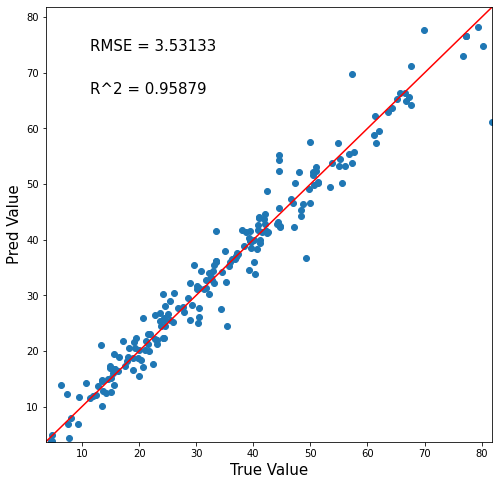

In [20]:
#  モデル評価用データを入れて、予測値を出力
predicted = gbm.predict(X_test)
 
#  予測値と正答値を、可視化関数にぶち込めるように加工
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']
 
#  可視化関数の起動
True_Pred_map(pred_df)

In [21]:
print(best_params)
print(tuning_history)

{'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 31, 'feature_fraction': 0.7200000000000001, 'bagging_fraction': 0.4463157580843784, 'bagging_freq': 3, 'min_child_samples': 20, 'objective': 'regression', 'metric': 'rmse', 'feature_pre_filter': 'False'}
[{'action': 'feature_fraction', 'trial': 0, 'value': "{'feature_fraction': 0.5}", 'val_score': 4.0946018179085915, 'elapsed_secs': 0.8095357418060303, 'average_iteration_time': 0.0015749722603230162}, {'action': 'feature_fraction', 'trial': 1, 'value': "{'feature_fraction': 0.6}", 'val_score': 4.0946018179085915, 'elapsed_secs': 1.1136608123779297, 'average_iteration_time': 0.002166655276999863}, {'action': 'feature_fraction', 'trial': 2, 'value': "{'feature_fraction': 0.4}", 'val_score': 3.9316139524095592, 'elapsed_secs': 1.4660489559173584, 'average_iteration_time': 0.005887746810913086}, {'action': 'feature_fraction', 'trial': 3, 'value': "{'feature_fraction': 0.8999999999999999}", 'val_score': 3.911221650113349, 'elapsed_secs': 3.

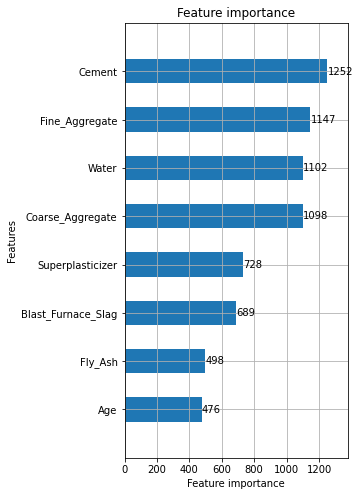

In [22]:
lgb.plot_importance(gbm, height=0.5, figsize=(4,8))

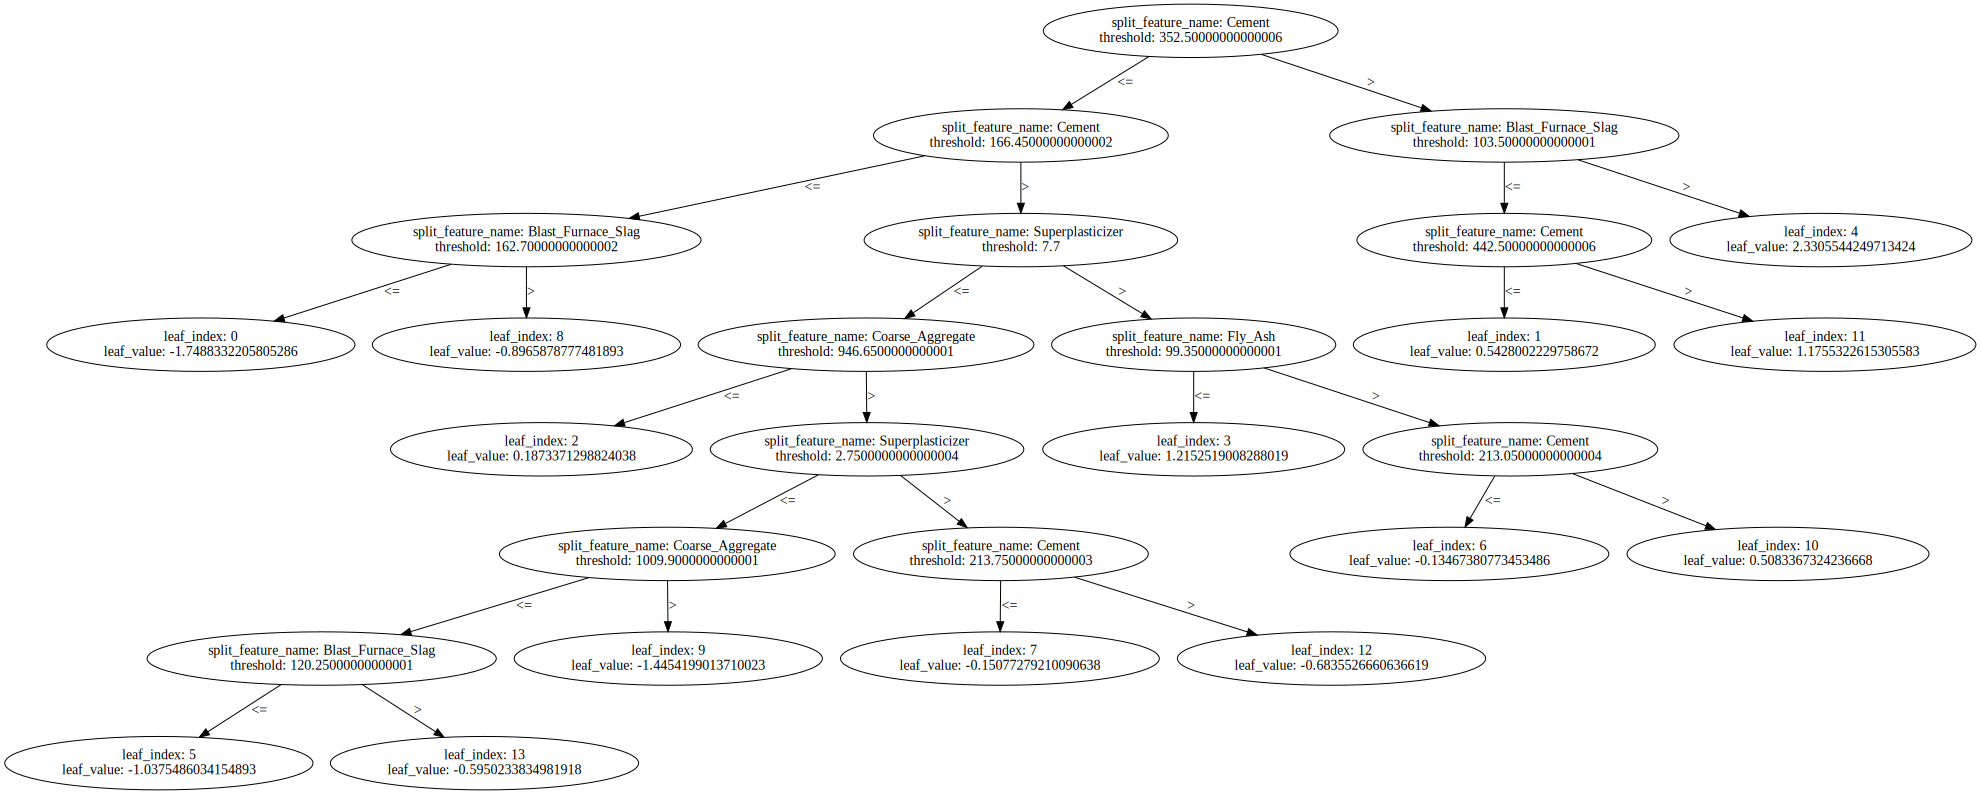

In [23]:
lgb.create_tree_digraph(gbm, 1)

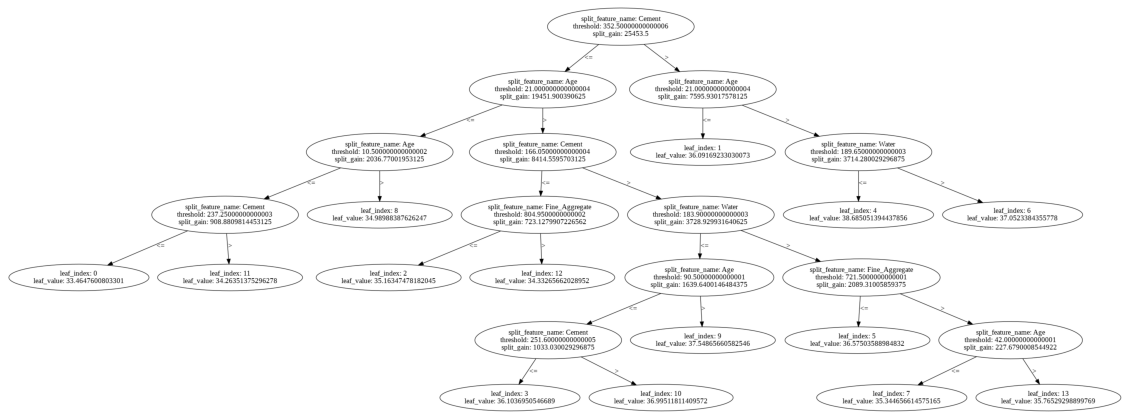

In [24]:
ax = lgb.plot_tree(gbm, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
plt.show()
# graph = lgb.create_tree_digraph(gbm, tree_index=0, format='png', name='Tree')
# graph.render(view=True)